In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from copy import copy
from pathlib import Path
import pickle
import os


In [2]:
##### circle ######
with open("gaussfit_circle_9-25.pkl",'rb') as pickle_file:
    result = pickle.load(pickle_file)

In [41]:
fit_data = result[0]    #[0:7]
cov_data = np.array(result[1]   )#[0:7]

In [42]:
xSigma=np.array([None]*len(fit_data.values))
ySigma=np.array([None]*len(fit_data.values))
xCenter=np.array([None]*len(fit_data.values))
yCenter = np.array([None]*len(fit_data.values))
peakSig = np.array([None]*len(fit_data.values))
theta = np.array([None]*len(fit_data.values))

for a in range(len(fit_data.values)):
    xSigma[a] = np.array(fit_data[a]['xSigma'])
    ySigma[a] = np.array(fit_data[a]['ySigma'])
    xCenter[a] = np.array(fit_data[a]['xCenter'] )
    yCenter[a] = np.array(fit_data[a]['yCenter'])
    peakSig[a] = np.array(fit_data[a]['peakSig'])
    theta[a] = np.array(fit_data[a]['theta'])
    



In [43]:
aError = [np.nan]*len(cov_data)
xMean_error = [np.nan]*len(cov_data)
yMean_error = [np.nan]*len(cov_data)
Sigma_error = [np.nan]*len(cov_data)


for q in range(len(cov_data)):
        aError[q], xMean_error[q], yMean_error[q], Sigma_error[q] = np.sqrt(np.diag(cov_data[q]))

In [44]:
Sigma_error = np.array(Sigma_error)

In [23]:
theta = theta[peakSig != np.array(None)]
xSigma = xSigma[peakSig != np.array(None)]
ySigma = ySigma[peakSig != np.array(None)]
cov_data = cov_data[peakSig!= np.array(None)]

Sigma_error= Sigma_error[peakSig != np.array(None)]

In [24]:
peakSig = peakSig[peakSig != np.array(None)]

In [45]:
xfwhm = 2.355*xSigma
fwhm_error = 2.355*Sigma_error

<ErrorbarContainer object of 3 artists>

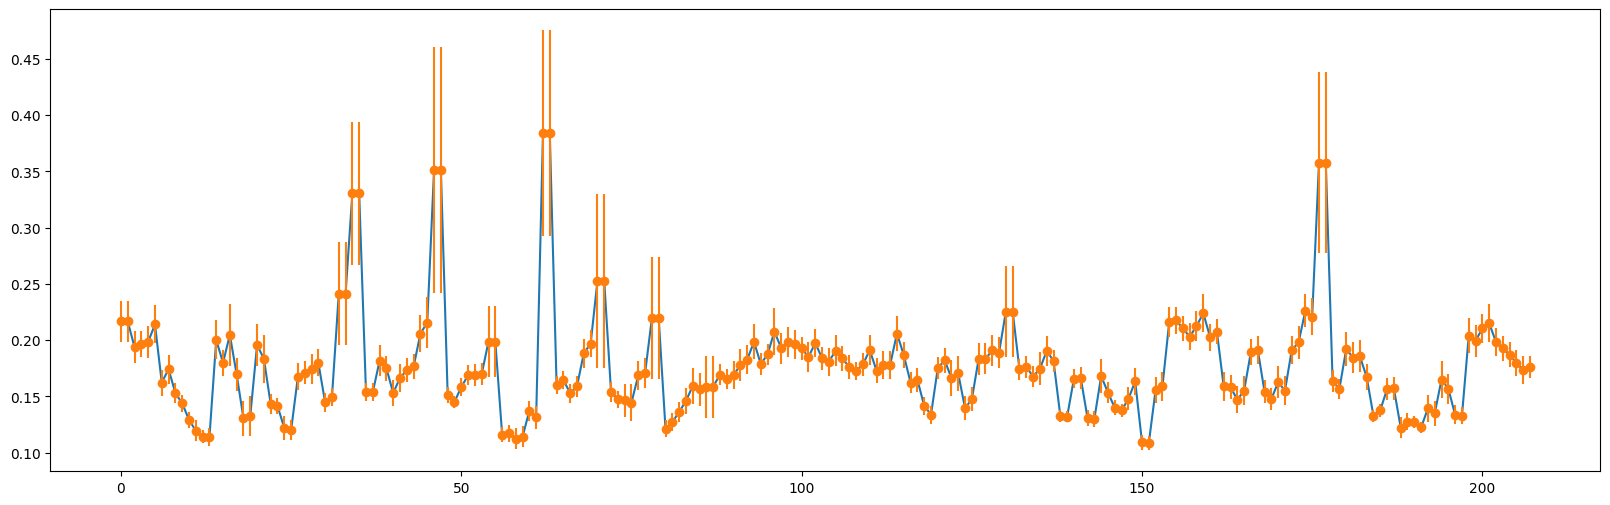

In [47]:
plt.figure(figsize=(20, 6))

plt.plot(range(len(xfwhm)),xfwhm)
plt.errorbar(range(len(xfwhm)),xfwhm,yerr=fwhm_error,fmt = 'o')


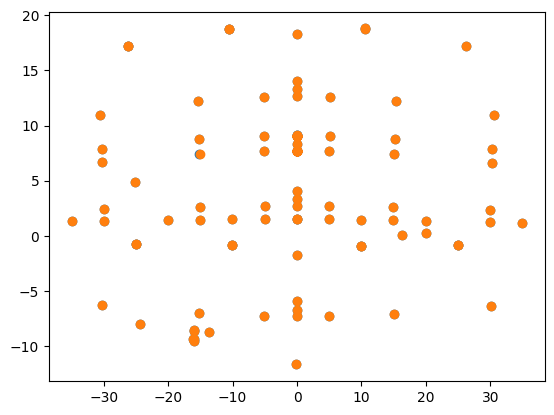

In [50]:
xCenter1 = xCenter[::2]
xCenter2 = xCenter[1::2]

yCenter1 = yCenter[::2]
yCenter2 = yCenter[1::2]

plt.scatter(xCenter1,yCenter1)
plt.scatter(xCenter2,yCenter2)
